## DAT_12_SF Midterm
____________________--

### About the data
For this midterm, you'll be working with a dataset related to classifying emails as spam. The dataset was built by researchers at the UCI Machine Learning Institute

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography... 



Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. 

###Definitions of the attributes: 
_______________-

####48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. 

####6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail 

####1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters 

####1 continuous integer [1,...] attribute of type capital_run_length_total 
= sum of length of uninterrupted sequences of capital letters 
= total number of capital letters in the e-mail 

####1 nominal {0,1} class attribute of type spam 
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',60)

%matplotlib inline

In [67]:
# more libraries
import statsmodels.formula.api as smf

from sklearn.metrics import confusion_matrix
from sklearn import cross_validation, neighbors, feature_selection
from sklearn.preprocessing import scale

import statsmodels as sm

from sklearn.linear_model import LogisticRegression

In [178]:
# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [68]:
# Load the spambase.csv as a pandas DataFrame (last column of data contains Target Data - is_spam)
spam_data = pd.read_csv("spambase.csv")
#spam_data.head()
# spam_data.describe()
#spam_data.info()

###Exercise 1: Explore the dataset and display some visualizations showing how the variables relate to each other


In [79]:
#spam_data.head()
spam_data.describe()
#spam_data.info()
#spam_data.shape

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### The data has about 40% spam and 60% ham.

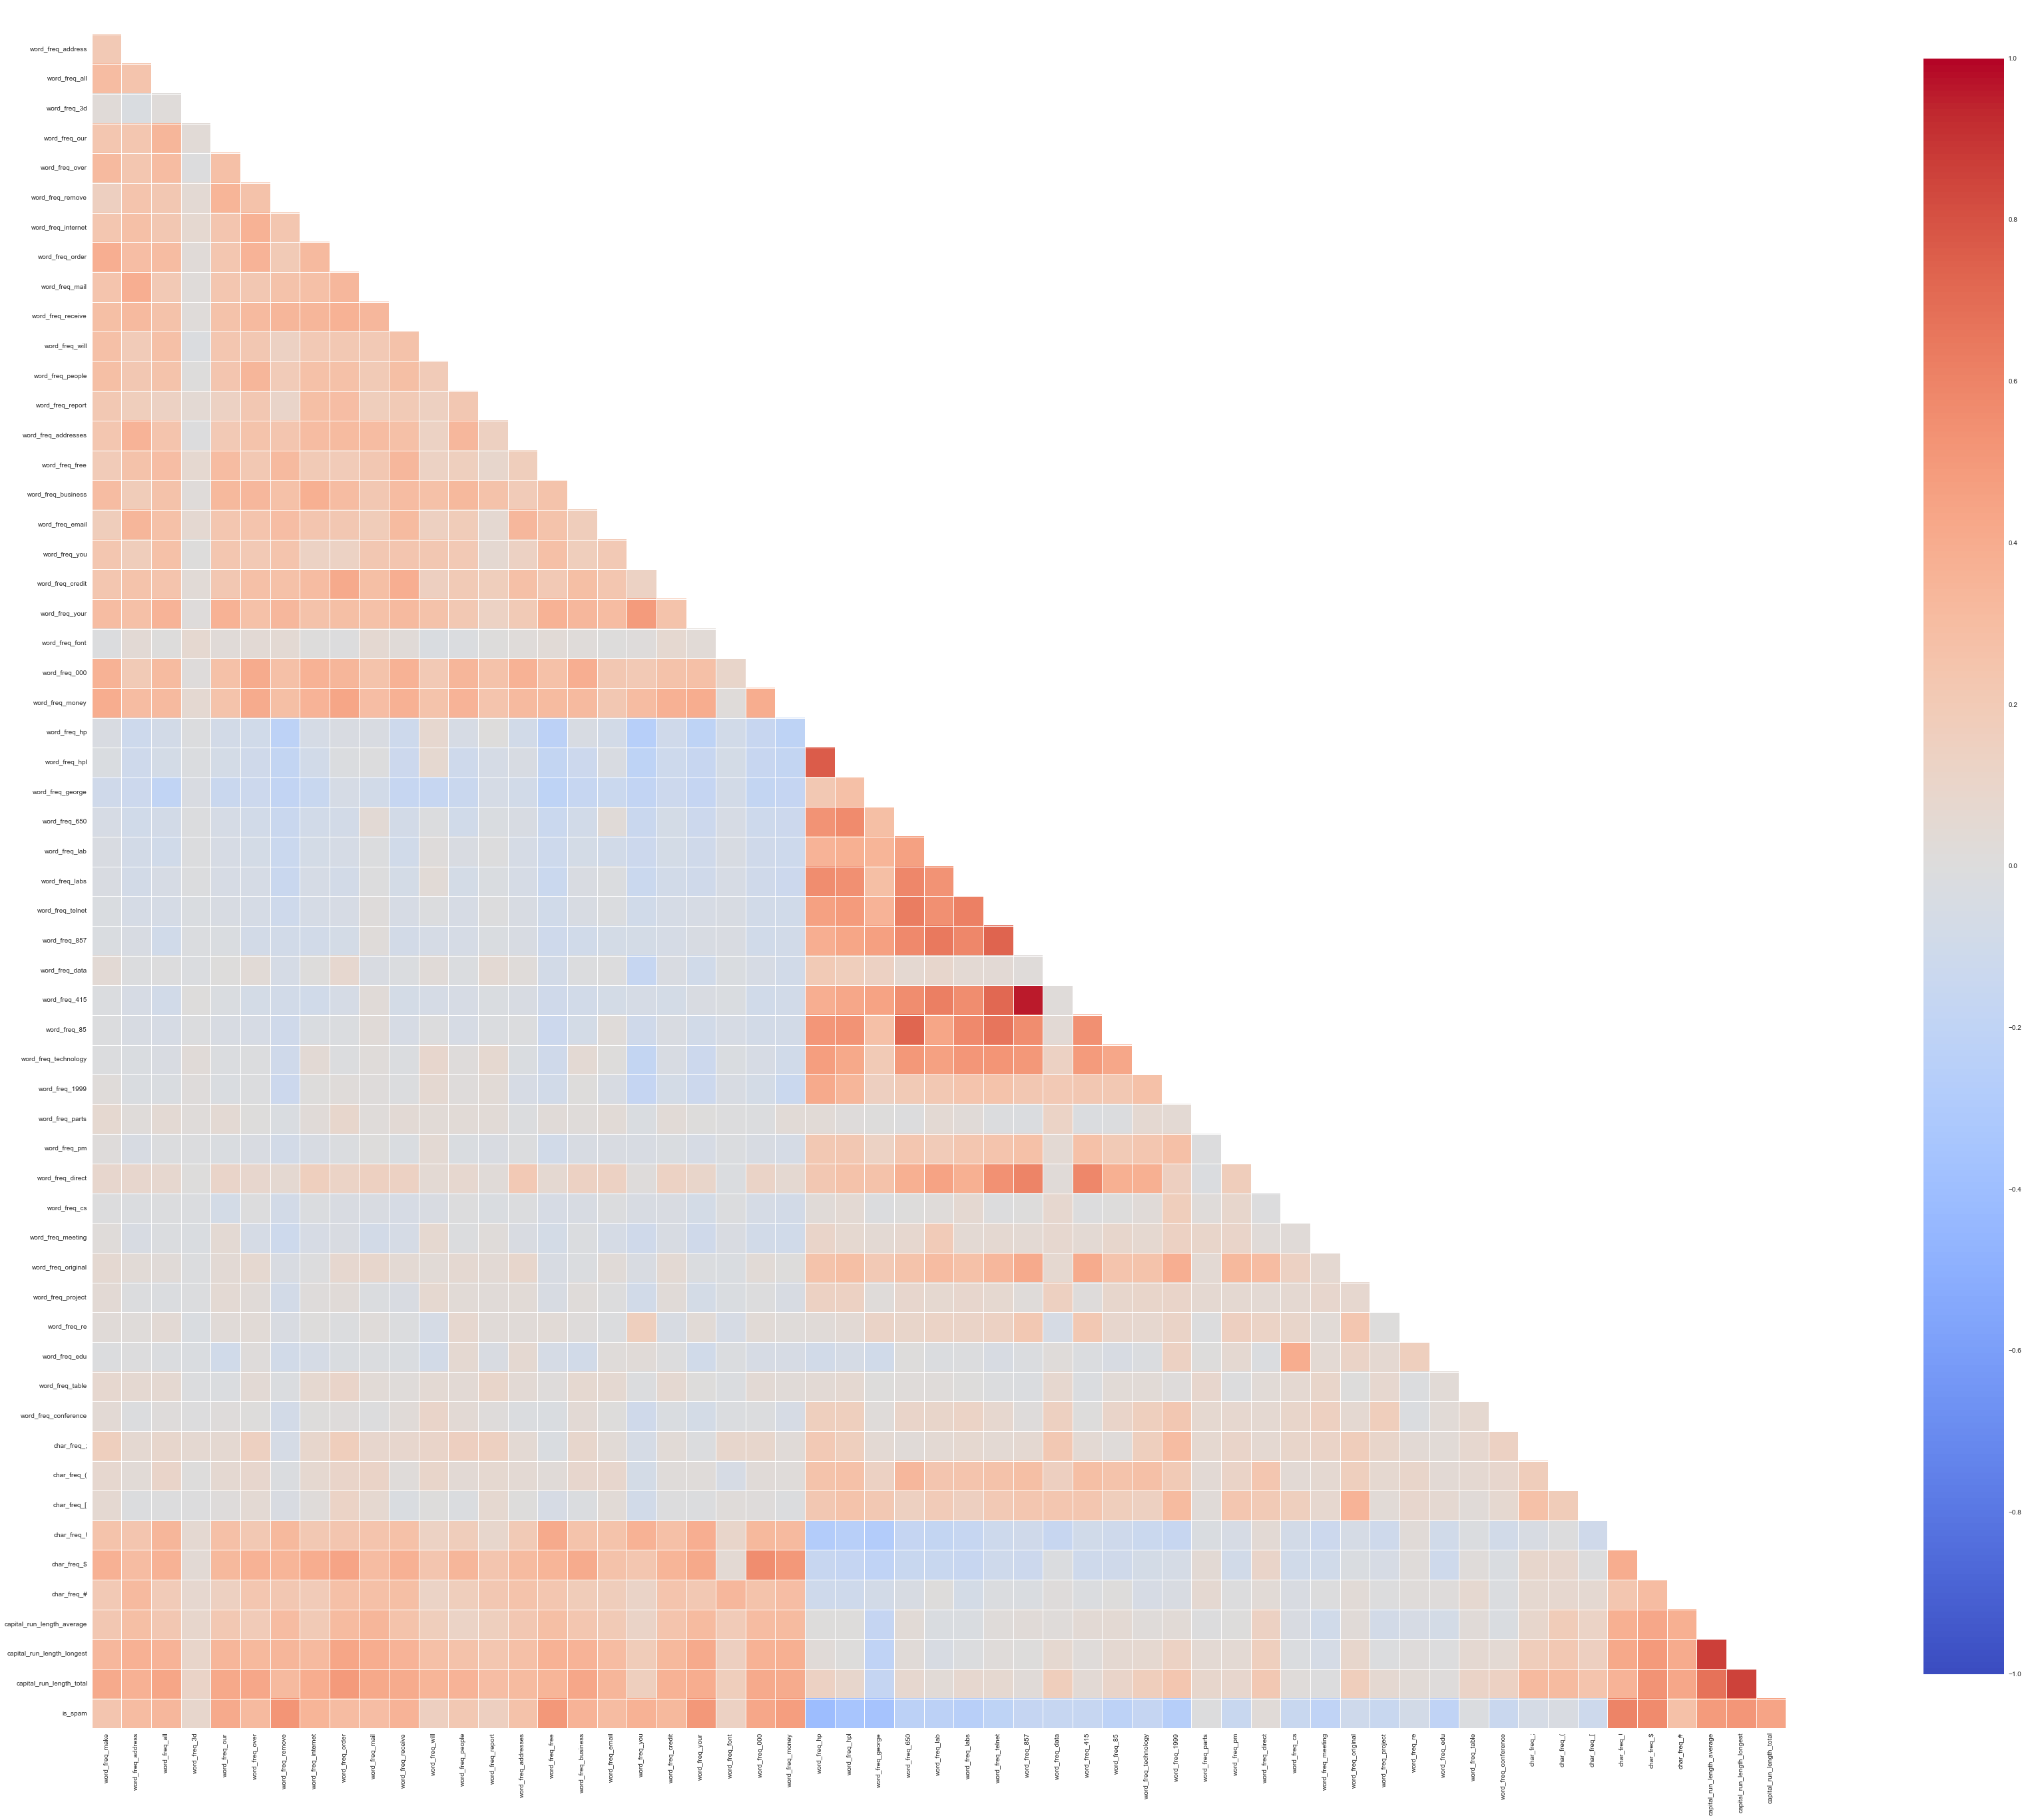

In [50]:
# Spearman correlation

f, ax = plt.subplots(figsize=(58, 58))
sns.corrplot(spam_data, annot=False, diag_names=False, method="spearman")#, cmap=cmap)
ax.grid(False);


####Spearman correlation between all columns in the data set:
There is a positive correlation between the word frequency of the phone numbers. Also, the capital-run-length features show a positive correlation.

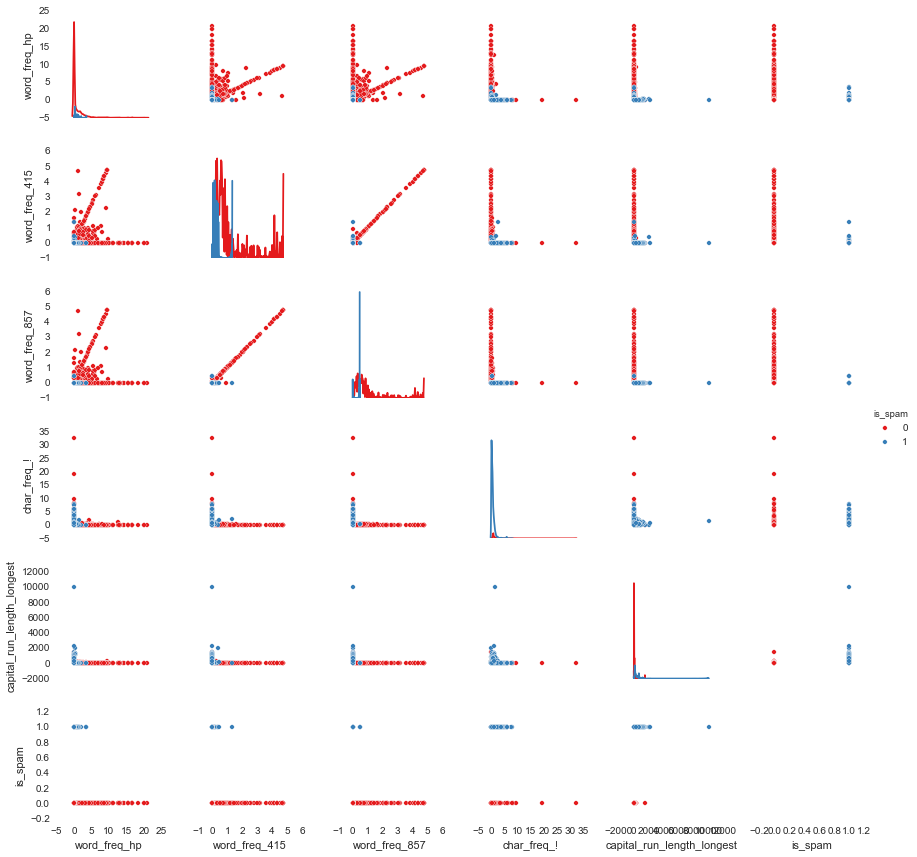

In [51]:
colIdx = ['word_freq_hp','word_freq_415','word_freq_857','char_freq_!','capital_run_length_longest','is_spam']
spam_show = spam_data.ix[:,colIdx]
sns.pairplot(spam_show, diag_kind='kde', hue='is_spam', size=2, palette='Set1')

# old:
#is_spam = spam_data.ix[:,'is_spam'] #is_spam = spam_data.icol([57]) 
#spam_sub = spam_sub.join(is_spam)

####Scatter plot between selected features:
- Strong correlation between word_freq_415 and word_freq_857
- Some features have a huge scale that is not uniformly distributed, e.g. capital_run_length_longest

In [22]:
# log-transform all but is_spam
feat_idx = range(spam_data.shape[1]-1) # index for all features
spam_data_log = spam_data.copy()
spam_data_log.ix[:,feat_idx] = np.log10(spam_data_log.ix[:,feat_idx]+1)


In [11]:
#print spam_data['capital_run_length_longest'].head()
#print spam_data_log['capital_run_length_longest'].head()

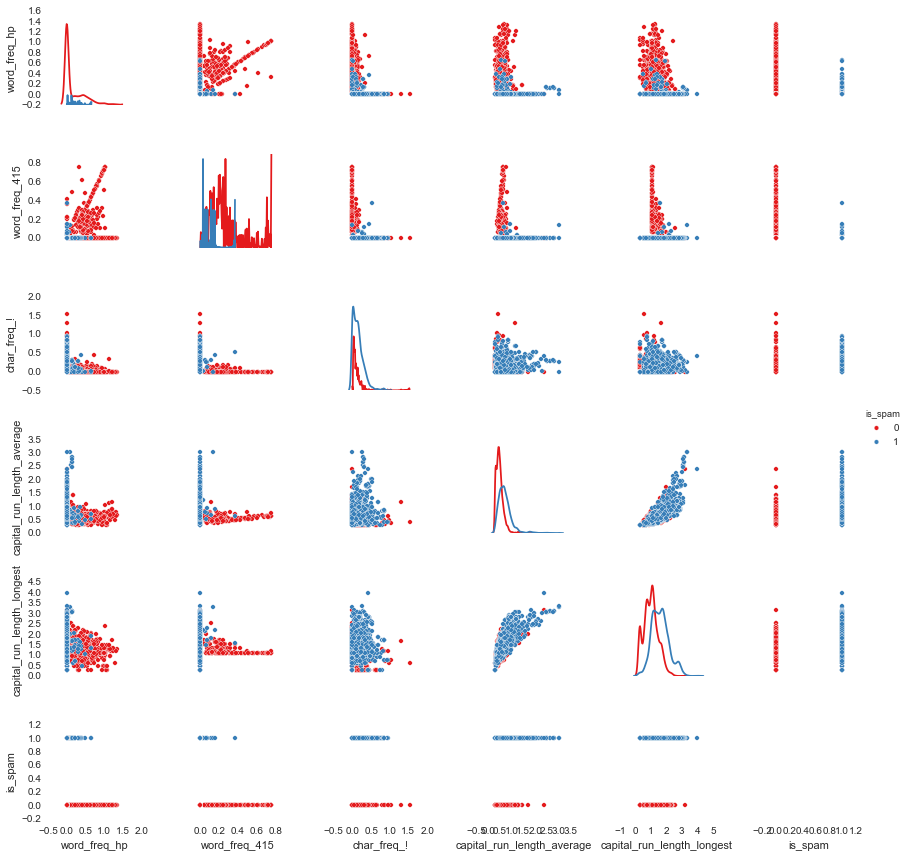

In [84]:
# scatter plot with log-transformed features

colIdx = ['word_freq_hp','word_freq_415','char_freq_!',
          'capital_run_length_average','capital_run_length_longest','is_spam']
spam_show = spam_data_log.ix[:,colIdx]
sns.pairplot(spam_show, diag_kind='kde', hue='is_spam', size=2, palette='Set1')

#### Pair plot for selected features with log-transform:
- The log-transform results in a better distribution of the feature values.
- The histogram of capital_run_length_longest show a good distribution.

###Exercise 2: Build a simple logistic regression and visualize it

use the variable "capital_run_length_longest" to predict "is_spam"
How accurate is this single feature?

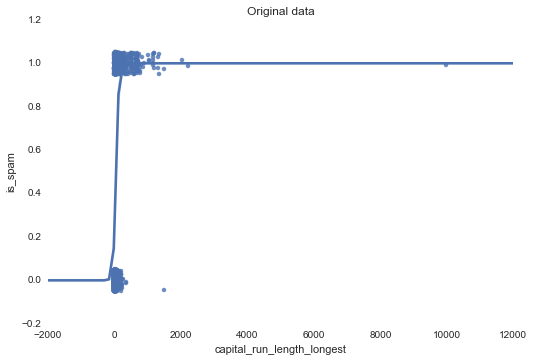

In [15]:
#your code here
sns.lmplot("capital_run_length_longest", "is_spam", data=spam_data    ,y_jitter=.05, aspect=1.5, logistic=True);
plt.title('Original data')

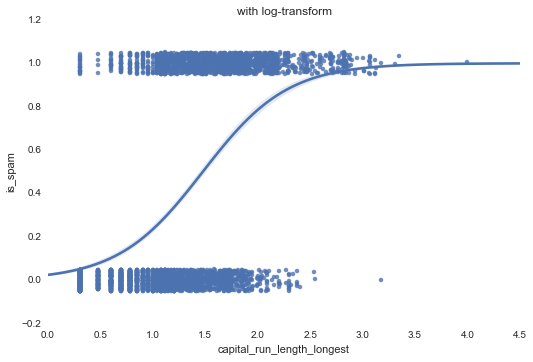

In [104]:
sns.lmplot("capital_run_length_longest", "is_spam", data=spam_data_log,y_jitter=.05, aspect=1.5, logistic=True);
plt.title('with log-transform')

In [173]:
y=spam_data["is_spam"].values # for both

res = smf.logit("is_spam ~ capital_run_length_longest", data=spam_data).fit();
yh=np.round(res.predict())
accu_orig = np.sum(y==yh)/float(len(y))
#res.summary()

res = smf.logit("is_spam ~ capital_run_length_longest", data=spam_data_log, verbose=1).fit();
yh_log=np.round(res.predict())
accu_log = np.sum(y==yh_log)/float(len(y))
#res.summary()

print "Accuracy_orig=", accu_orig
print "Accuracy_log =", accu_log

Optimization terminated successfully.
         Current function value: 0.562963
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.519295
         Iterations 6
Accuracy_orig= 0.725494457727
Accuracy_log = 0.736579004564


#### Accuracy is 72.4% for original data and 73.7% for the log-transformed data.

In [186]:
pd.DataFrame(confusion_matrix(y, yh), 
             index = pd.MultiIndex.from_product([['actual'], ['ham','is_spam']]),
             columns = pd.MultiIndex.from_product([['predicted'], ['ham','is_spam']]))

predicted        
                     ham is_spam
actual ham          2567     221
       is_spam      1042     771

In [185]:
pd.DataFrame(confusion_matrix(y, yh_log), 
             index = pd.MultiIndex.from_product([['actual'], ['ham','is_spam']]),
             columns = pd.MultiIndex.from_product([['predicted'], ['ham','is_spam']]))

predicted        
                     ham is_spam
actual ham          2341     447
       is_spam       765    1048

#### Log-transformed data is better in predicting spam, but worse in predicting ham.

### Exercise 3: Use train-test spit to split your data at a 30% mark and run another logistic regression using all variables
use random state = 12 so that we can compare results

In [69]:
# separate features from label
isSpamCol = spam_data.columns == 'is_spam'
X= spam_data[spam_data.columns[~isSpamCol]]
y= spam_data[spam_data.columns[ isSpamCol]]
# add constant
X = sm.tools.add_constant(X)
# squeeze y
y = np.squeeze(y)

# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)

# fit model
res = smf.Logit(y_train,X_train).fit();
#res.summary()

# predict y and round to create label
print "statsmodel LR"
y_pred = np.round(res.predict(X_train))
print "Accuracy train: ", np.sum(y_train==y_pred)/float(len(y_pred))
y_pred = np.round(res.predict(X_test))
print "Accuracy test : ", np.sum(y_test==y_pred)/float(len(y_pred))

# scikit-learn Logistic Regression
sLR = LogisticRegression(fit_intercept=False)
sLR.fit(X_train,y_train)

print "scikit-learn LR"
print "Accuracy train: ", sLR.score(X_train,y_train)
print "Accuracy test : ", sLR.score(X_test,y_test)

Optimization terminated successfully.
         Current function value: 0.190788
         Iterations 15
statsmodel LR
Accuracy train:  0.929192546584
Accuracy test :  0.926140477915
scikit-learn LR
Accuracy train:  0.927639751553
Accuracy test :  0.931933381608


In [413]:
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             index = pd.MultiIndex.from_product([['actual'], ['ham','is_spam']]),
             columns = pd.MultiIndex.from_product([['predicted'], ['ham','is_spam']]))

predicted        
                     ham is_spam
actual ham           810      45
       is_spam        57     469

#### Test accuracy is 92.6% and 93.2%. More confusion comes from the spam.

###Exercise 4: Apply Crossvalidation to see how the model fares across different splits of your date

#### Use crossvalidation to score model

In [19]:
# k-fold Cross-validation onfull data set 
sLR = LogisticRegression(fit_intercept=False)
sLR.fit(X,y)

for k_fold in [3,5,10,20]:
    scores = cross_validation.cross_val_score(sLR, X, y, cv=k_fold)
    print "k=", ("%2i : Accuracy= %0.3f (+/- %0.3f)" % (k_fold, scores.mean(), scores.std()))

k=  3 : Accuracy= 0.904 (+/- 0.019)
k=  5 : Accuracy= 0.913 (+/- 0.040)
k= 10 : Accuracy= 0.918 (+/- 0.034)
k= 20 : Accuracy= 0.920 (+/- 0.047)


### Exercise 5: Compare Performance of Logistic Regression to KNN with 3 neighbors
-Which model is more accurate?

In [23]:
# k-fold Cross-validation onfull data set for 2 models:
# k-fold Cross-validation onfull data set 

# create log-transformed and scaled data for knn
X_log = spam_data_log[spam_data_log.columns[~isSpamCol]]
X_log = pd.DataFrame(scale(X_log), columns=X_log.columns)

sLR = LogisticRegression(fit_intercept=False)
sLR.fit(X,y)

sLR_log = LogisticRegression(fit_intercept=True)
sLR_log.fit(X_log,y)

knn = neighbors.KNeighborsClassifier(11, weights='uniform')
knn.fit(X,y)

knn_log = neighbors.KNeighborsClassifier(11, weights='uniform')
knn_log.fit(X_log,y)

for k_fold in [3,5,10,20]:
    scores_LR      = cross_validation.cross_val_score(sLR     , X    , y, cv=k_fold)
    scores_LR_log  = cross_validation.cross_val_score(sLR_log , X_log, y, cv=k_fold)
    scores_kNN     = cross_validation.cross_val_score(knn     , X    , y, cv=k_fold)
    scores_kNN_log = cross_validation.cross_val_score(knn_log , X_log, y, cv=k_fold)
    print"k-fold=" , ("%2i : LR = %0.3f (%0.3f)" % (k_fold, scores_LR.mean(), scores_LR.std())), \
                (", LR_log = %0.3f (%0.3f)" % (    scores_LR_log.mean()    , scores_LR_log.std()) ), \
                (", kNN = %0.3f (%0.3f)" % (    scores_kNN.mean()    , scores_kNN.std()) ), \
                (", kNN_log = %0.3f (%0.3f)" % (scores_kNN_log.mean(), scores_kNN_log.std()) )

k-fold=  3 : LR = 0.904 (0.019) , LR_log = 0.924 (0.028) , kNN = 0.757 (0.030) , kNN_log = 0.899 (0.034)
k-fold=  5 : LR = 0.913 (0.040) , LR_log = 0.925 (0.045) , kNN = 0.760 (0.039) , kNN_log = 0.903 (0.053)
k-fold= 10 : LR = 0.918 (0.034) , LR_log = 0.932 (0.034) , kNN = 0.769 (0.040) , kNN_log = 0.921 (0.032)
k-fold= 20 : LR = 0.920 (0.047) , LR_log = 0.933 (0.051) , kNN = 0.779 (0.047) , kNN_log = 0.922 (0.043)


#### Accuracies from cross-validation:
- log-transform has big impact on KNN: without it, LR is significantly better with a mean accuracy of 91.8% for 10-fold CV; KNN has only 76.9% 
- with log-transform, KNN and LR show similar performance, but LR is still slightly larger with 93.2% compared to 92.1% (10-fold CV)

### Exercise 6: Evaluate Feature Importance
Which features are the most influential in this model?

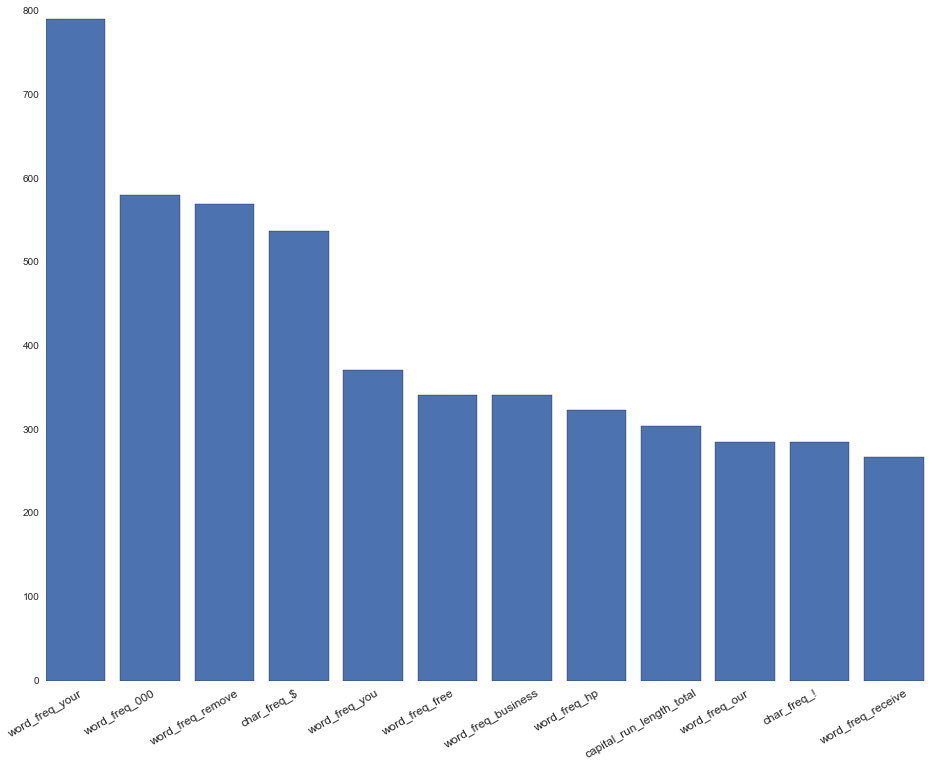

In [75]:
# 1. approach: F-statistic
isSpamCol = spam_data.columns == 'is_spam'
X= spam_data[spam_data.columns[~isSpamCol]]
y= spam_data[spam_data.columns[ isSpamCol]]

y = np.squeeze(y);
# show the first n-element
n= 12
nx = np.arange(n)

fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)

f =feature_selection.f_classif(X, y)[0]

# create sort index in descending order
sortIdx = np.argsort(f)[::-1]

ax.bar(nx, f[sortIdx[:n]])
ax.set_xticks(nx)
xtickNames = ax.set_xticklabels(X.columns[sortIdx[:n]])
_ = plt.setp(xtickNames, rotation=30, fontsize=12)

#### Feature importance with F-statistics:
The plot above shows the 12 most important features measured by the F-statistics.

In [55]:
# 2. approach: model summary

# instantiate our model
# separate features from label
isSpamCol = spam_data.columns == 'is_spam'
X= spam_data[spam_data.columns[~isSpamCol]]
y= spam_data[spam_data.columns[ isSpamCol]]

# add constant
X = sm.tools.add_constant(X)

model = smf.Logit(y,X)
res = model.fit()# fit our model to the training data

res.summary()

Optimization terminated successfully.
         Current function value: 0.197323
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                is_spam   No. Observations:                 4601
Model:                          Logit   Df Residuals:                     4543
Method:                           MLE   Df Model:                           57
Date:                Wed, 11 Mar 2015   Pseudo R-squ.:                  0.7057
Time:                        20:10:55   Log-Likelihood:                -907.88
converged:                       True   LL-Null:                       -3085.1
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
const                         -1.5686      0.142    -11.044      0.000        -1.847    -1.290
word_freq_make                -0.3895      0.231     -1.683      0.092        -0.843     0.064
word_freq_address             -0.1458      0.069     -2.104      0.035        -0.282    -0.010
word_freq_all                  0.1141      0.110      1.035      0.301        -0.102     0.330
word_freq_3d                   2.2515      1.507      1.494      0.135        -0.702     5.205
word_freq_our                  0.5624      0.102      5.524      0.000         0.363     0.762
word_freq_over                 0.8830      0.250      3.534      0.000         0.393     1.373
word_freq_remove               2.2785      0.333      6.846      0.000         1.626     2.931
word_freq_internet             0.5696      0.168      3.387      0.001         0.240     0.899
word_freq_order                0.7343      0.285      2.577      0.010         0.176     1.293
word_freq_mail                 0.1275      0.073      1.755      0.079        -0.015     0.270
word_freq_receive             -0.2557      0.298     -0.858      0.391        -0.840     0.328
word_freq_will                -0.1383      0.074     -1.868      0.062        -0.283     0.007
word_freq_people              -0.0796      0.230     -0.346      0.730        -0.531     0.372
word_freq_report               0.1447      0.136      1.061      0.289        -0.123     0.412
word_freq_addresses            1.2362      0.725      1.704      0.088        -0.186     2.658
word_freq_free                 1.0386      0.146      7.128      0.000         0.753     1.324
word_freq_business             0.9599      0.225      4.264      0.000         0.519     1.401
word_freq_email                0.1203      0.117      1.027      0.305        -0.109     0.350
word_freq_you                  0.0813      0.035      2.320      0.020         0.013     0.150
word_freq_credit               1.0474      0.538      1.946      0.052        -0.008     2.102
word_freq_your                 0.2419      0.052      4.615      0.000         0.139     0.345
word_freq_font                 0.2013      0.163      1.238      0.216        -0.117     0.520
word_freq_000                  2.2452      0.471      4.762      0.000         1.321     3.169
word_freq_money                0.4264      0.162      2.630      0.009         0.109     0.744
word_freq_hp                  -1.9204      0.313     -6.139      0.000        -2.534    -1.307
word_freq_hpl                 -1.0402      0.440     -2.366      0.018        -1.902    -0.179
word_freq_george             -11.7672      2.113     -5.569      0.000       -15.909    -7.626
word_freq_650                  0.4454      0.199      2.237      0.025         0.055     0.836
word_freq_lab                 -2.4864      1.502     -1.656      0.098        -5.429     0.457
word_freq_labs                -0.3299      0.314     -1.052      0.293        -0.945     0.285
word_freq_t

#### Model summary:
The summary show that many features have significant p-values below 0.001, high abs(z) above 3, and confidence intervals that do not include zero. The plots below show more details.

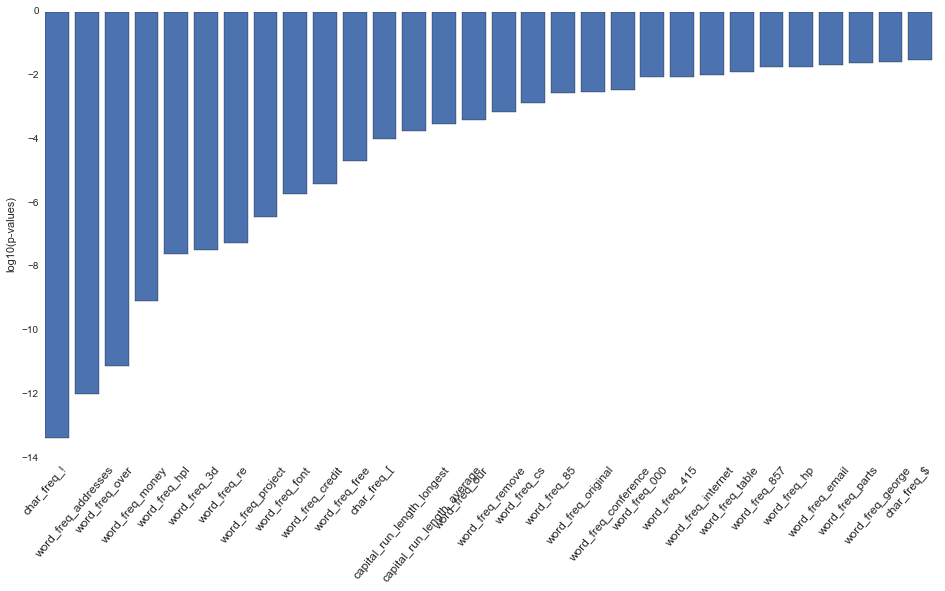

In [56]:
# p-values
n= 30
nx = np.arange(n)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

p = np.log10(res.pvalues[1:]) # no const/intercept

# create sort index in descending order
sortIdx = np.argsort(p)

ax.bar(nx, p[sortIdx[:n]])
ax.set_xticks(nx)
xtickNames = ax.set_xticklabels(X.columns[sortIdx[:n]])
_ = plt.setp(xtickNames, rotation=50, fontsize=12)
plt.ylabel('log10(p-values)')

#### P-values:
The plot above shows the features with the lowest p-values.

max. logit=  207.683932304  by  char_freq_$


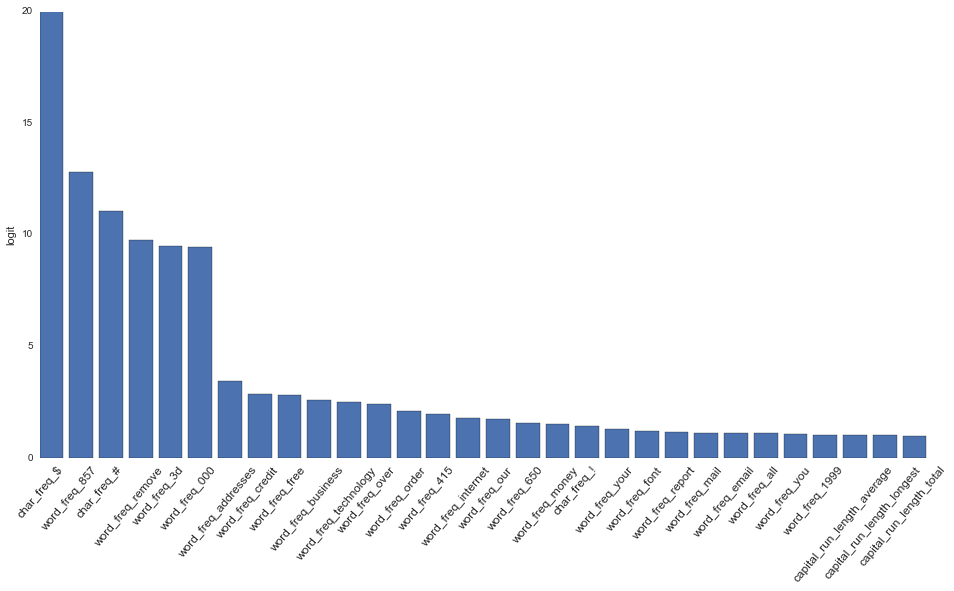

In [13]:
# 3. approach: logit 
n= 30
nx = np.arange(n)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

p = np.exp(res.params)

# create sort index in descending order
sortIdx = np.argsort(p)[::-1]

ax.bar(nx, p[sortIdx[:n]])
ax.set_xticks(nx)
xtickNames = ax.set_xticklabels(X.columns[sortIdx[:n]])
_ = plt.setp(xtickNames, rotation=50, fontsize=12)
plt.ylabel('logit')
plt.ylim([0,20])
print "max. logit= ",p[sortIdx[0]], " by ",X.columns[sortIdx[0]]

#### Logit:
The plot above shows the logit. Note that the range of y-axis is limited.
- The maximum logit is 207.7 by "char\_freq\_$".
- The first six feature with the highest logit have a strong impact on the model. Then, the logit values drop abruptly.

Optimal number of features : 34


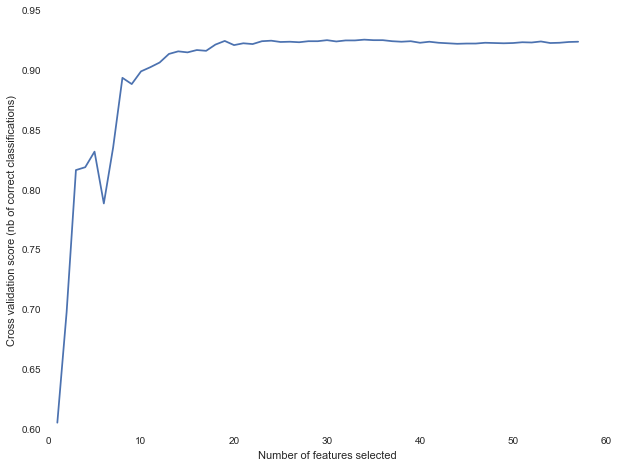

In [232]:
# 4. approach: Recursive feature elimination with cross-validation
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# data:
# separate features from label
isSpamCol = spam_data.columns == 'is_spam'
y= spam_data[spam_data.columns[ isSpamCol]]
# squeeze y
y = np.squeeze(y)

#X_tmp= spam_data[spam_data.columns[~isSpamCol]]
# add constant
#X_tmp = sm.tools.add_constant(X)
#sLR = LogisticRegression(fit_intercept=False)
#sLR.fit(X_tmp,y)

# log-transformed
X_tmp = spam_data_log[spam_data_log.columns[~isSpamCol]]
X_tmp = pd.DataFrame(scale(X_tmp), columns=X_log.columns)
# model
sLR = LogisticRegression(fit_intercept=True)
sLR.fit(X_tmp,y)

# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=sLR, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_tmp, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [236]:
# the first moset important features
print spam_data_log.columns[rfecv.ranking_[:20]]

Index([u'word_freq_internet', u'word_freq_free', u'word_freq_font', u'word_freq_address', u'word_freq_address', u'word_freq_all', u'word_freq_address', u'word_freq_address', u'word_freq_you', u'word_freq_addresses'], dtype='object')


#### Recursive feature elimination:
From the above result, the log-transformed data has a subset for 34 features that leads to a performance similar to the performance using all features. After the first 20 features, the performance curve is flat.


### Exercise 7: Plot the ROC Curve for the logistic regression you chose

In [83]:
# use similar function from Textmining lab
def plot_roc_curve(target_test, target_predicted_proba, labelText):
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba, 1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: ROC curve (area = {:.3f})'.format(labelText,roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.axis = 'True'

Optimization terminated successfully.
         Current function value: 0.190788
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.152314
         Iterations 15


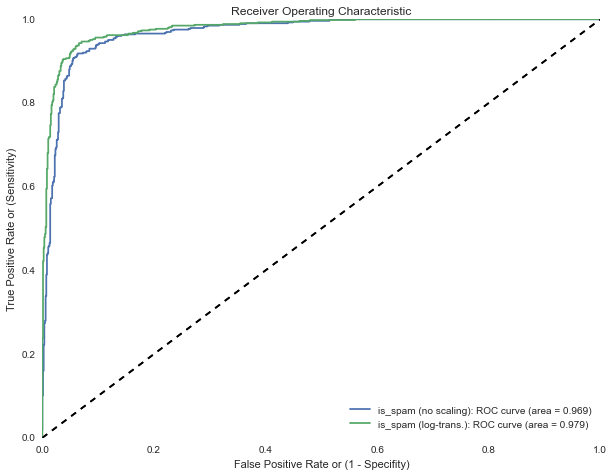

In [86]:
# build model and show ROC curve
# separate features from label
isSpamCol = spam_data.columns == 'is_spam'
X= spam_data[spam_data.columns[~isSpamCol]]
y= spam_data[spam_data.columns[ isSpamCol]]
# add constant
X = sm.tools.add_constant(X)
# squeeze y
y = np.squeeze(y)
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)
# fit model
res = smf.Logit(y_train,X_train).fit();
y_pred = res.predict(X_test)
 
plot_roc_curve(y_test, y_pred,'is_spam (no scaling)')

# log-transform
X= spam_data_log[spam_data.columns[~isSpamCol]]
y= spam_data_log[spam_data.columns[ isSpamCol]]
# add constant
X = sm.tools.add_constant(X)
# squeeze y
y = np.squeeze(y)
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)
# fit model
res = smf.Logit(y_train,X_train).fit();
y_pred = res.predict(X_test)

plot_roc_curve(y_test, y_pred,'is_spam (log-trans.)')




#### ROC curve:
The AUC is 96.9% (no scaling) and 97.9% (log-transform).

### Exercise 8: Demonstrate how the accurary of your predictions changes when you set your threshold to levels other than 50%

In [157]:
# create different thresholds and calculate the accuracy
n = 10
threshList = np.arange(n+1)/float(n) # list of thresholds
accu_set = []
TP_set = []
TN_set = []

for t in threshList:
    y_pred_tmp = (y_pred>=t)
    
    accu = np.sum(y_test==y_pred_tmp)/float(len(y_pred_tmp))
    TP   = np.sum((y_test==y_pred_tmp) & (y_test==1))/float(np.sum(y_test==1))
    TN   = np.sum((y_test==y_pred_tmp) & (y_test==0))/float(np.sum(y_test==0))
    print "t = %0.1f: Accuracy= %0.3f, TP= %0.3f, TN= %0.3f" % (t, accu, TP, TN)
    
    # store values
    accu_set.append(accu)
    TP_set.append(TP)
    TN_set.append(TN)

t = 0.0: Accuracy= 0.381, TP= 1.000, TN= 0.000
t = 0.1: Accuracy= 0.839, TP= 0.975, TN= 0.754
t = 0.2: Accuracy= 0.892, TP= 0.964, TN= 0.848
t = 0.3: Accuracy= 0.915, TP= 0.943, TN= 0.897
t = 0.4: Accuracy= 0.922, TP= 0.920, TN= 0.923
t = 0.5: Accuracy= 0.926, TP= 0.892, TN= 0.947
t = 0.6: Accuracy= 0.919, TP= 0.857, TN= 0.957
t = 0.7: Accuracy= 0.905, TP= 0.808, TN= 0.965
t = 0.8: Accuracy= 0.886, TP= 0.749, TN= 0.971
t = 0.9: Accuracy= 0.844, TP= 0.627, TN= 0.978
t = 1.0: Accuracy= 0.621, TP= 0.006, TN= 1.000


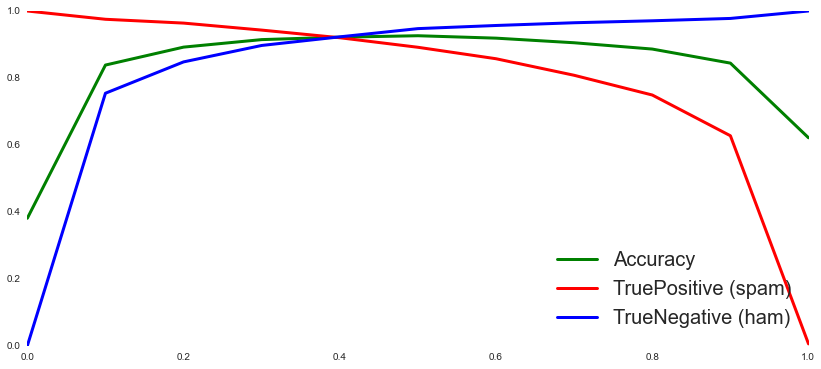

In [180]:

# plot the result
plt.figure(figsize=(14,6))
_ = plt.plot(threshList,accu_set,'g', linewidth=3.0, label='Accuracy')
_ = plt.plot(threshList,TP_set,'r', linewidth=3.0, label='TruePositive (spam)')
_ = plt.plot(threshList,TN_set,'b', linewidth=3.0, label='TrueNegative (ham)')

plt.legend(fontsize=20,loc='lower right')


#### Accuracy as a function of threshold:
The plot and the results above show the test accuracy and the TP and TN values for different values:
- The threshold 0.4 has the best tradeoff between spam and ham sensitivity, which corresponds to the fraction of spams in the data set.



###Exercise 9: Discuss the pro's/con's of moving the threshold away from 50%, why is/isn't this a good idea? 

#### Discussion:
Pro:
From Exercise 8 we see that changing the threshold can account for data imbalance, e.g. if more ham than spam is present. The lower threshold of 40% leads to an balanced TP and TN rate, i.e. an equal probability to be predicted.

Con:
The data imbalance of the labels is present in this data set that we use to build the model. We don't know how the future data will be distributed. Changing the threshold away from 50% can lead to an overfitting effect that decreases the performance of the model.

###Bonus: Apply PCA to the features and visualize the data in two dimensions: 

In [228]:
# run logistic regression for different sets of PCA components

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import StandardScaler

# separate features from label
isSpamCol = spam_data.columns == 'is_spam'
X= spam_data_log[spam_data.columns[~isSpamCol]]
y= spam_data_log[spam_data.columns[ isSpamCol]]
# squeeze y
y = np.squeeze(y)
# split data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=12)

# scale data: 
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test  = scalar.transform(X_test)

# PCA
aucSet = []
ncompSet = np.arange(56)+2;
for ncomp in ncompSet:
    pca = PCA(n_components=ncomp, whiten=True)
    pca.fit(X_train)
    X_pca_train = pca.transform(X_train)
    X_pca_test = pca.transform(X_test)
    
    # add constant after PCA
    X_pca_train = sm.tools.add_constant(X_pca_train)
    X_pca_test = sm.tools.add_constant(X_pca_test)

    # fit model
    res = smf.Logit(y_train,X_pca_train).fit();
    y_pred = res.predict(X_pca_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    aucSet.append(auc(fpr, tpr))


Optimization terminated successfully.
         Current function value: 0.256186
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.254957
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.241151
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.240688
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.240677
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.233744
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.231745
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.230705
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.205375
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.203849
  

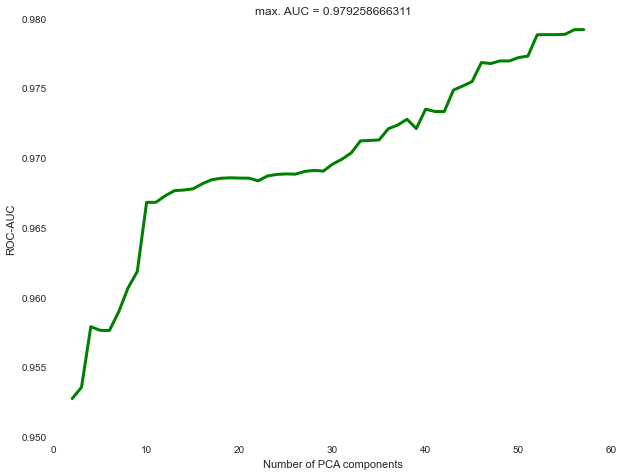

In [226]:
# display results
#for nc in range(len(ncompSet)):
#    print "PCA comp = %2i: ROC AUC= %0.3f" % (ncompSet[nc], aucSet[nc])

_ = plt.plot(ncompSet,aucSet,'g', linewidth=3.0)
plt.xlabel('Number of PCA components')
plt.ylabel('ROC-AUC')
plt.title('max. AUC = {}'.format(np.max(aucSet)))

#### Logistic Regression with PCA components:
The plot above shows that all PCA components are needed to achieve the best AUC value.

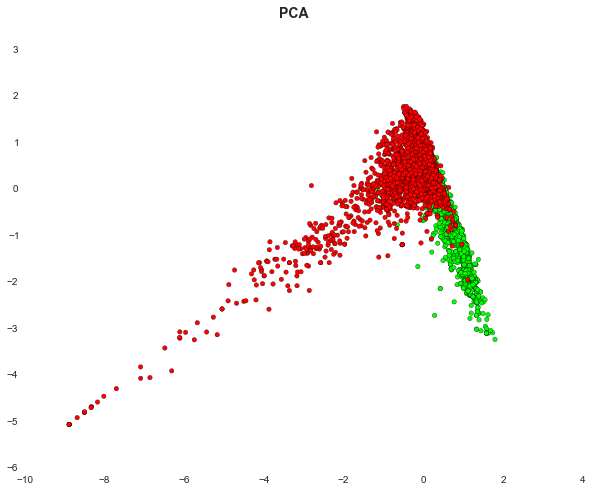

In [186]:
# visualize the PCA components

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# create log-transformed and scaled data
X_log = spam_data_log[spam_data_log.columns[~isSpamCol]]
X_log = pd.DataFrame(scale(X_log), columns=X_log.columns)

pca = PCA(n_components=2, whiten=True)
pca.fit(X_log)
X_pca = pca.transform(X_log)

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X_pca[:,0], X_pca[:,1],   c=y, cmap=cmap_bold)

plt.suptitle('PCA', fontweight='bold', fontsize=14);

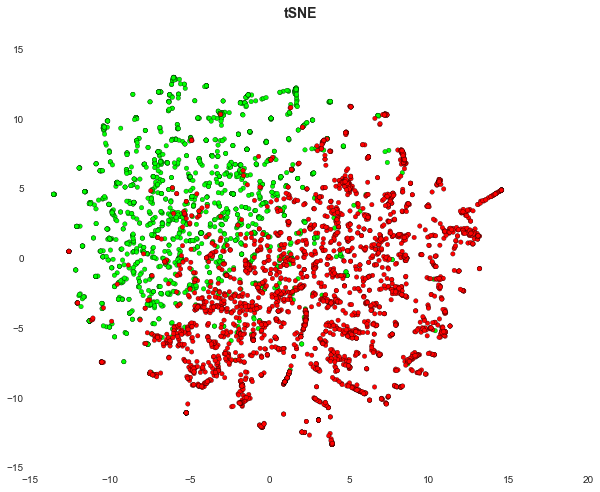

In [192]:
# a non-linear dimesionality reduction method...takes a bit to calculate

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
X_t = tsne.fit_transform(X_log)

cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
plt.scatter(X_t[:,0], X_t[:,1],   c=y, cmap=cmap_bold)

plt.suptitle('tSNE', fontweight='bold', fontsize=14);


In [ ]:
model.